# Cleaning and exporting New Customer List dataset

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Loading New Customer Data from excel file

new_cust = pd.read_excel('Raw_data.xlsx', sheet_name='NewCustomerList')

C:\Users\vedid\AppData\Local\Temp\ipykernel_10880\3847063873.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust = pd.read_excel('Raw_data.xlsx', sheet_name='NewCustomerList')


In [3]:
new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

`The data type of the feature columns are fine. However, 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20' are irrelevant columns and hence should be dropped.`

In [5]:
new_cust.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

## Total Records

In [6]:
print(f'Total records: {len(new_cust)}')
print(f'Total columns: {len(new_cust.columns)}')

Total records: 1000
Total columns: 18


## Numeric and non-numeric Columns

In [9]:
# select numeric columns
num_cols = new_cust.select_dtypes(include=np.number)
print(f'numeric columns: \n{num_cols.columns}')

non_num_cols = new_cust.select_dtypes(exclude=np.number)
print(f'Non-numeric columns: \n{non_num_cols.columns}')

numeric columns: 
Index(['past_3_years_bike_related_purchases', 'tenure', 'postcode',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')
Non-numeric columns: 
Index(['first_name', 'last_name', 'gender', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'state', 'country'],
      dtype='object')


## 1. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [10]:
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [11]:
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

### 2.1 Last Name
Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None"

In [12]:
new_cust[new_cust['first_name'].isnull()][["first_name"]].isnull().sum()

first_name    0.0
dtype: float64

In [13]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [14]:
new_cust['last_name'].fillna('None', axis=0, inplace=True)

In [15]:
new_cust['last_name'].isnull().sum()

0

## 1.2 Date of Birth

In [16]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [17]:
new_cust[new_cust['DOB'].isnull()][["DOB"]].isnull().sum()

DOB    17
dtype: int64

In [18]:
new_cust['DOB'].isnull().mean()*100

1.7000000000000002

`Since [Less than 5 %] of data has null date of birth. we can remove the records where date of birth is null`

In [20]:
# dropping the index where DOB is null

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index

new_cust.drop(dob_index_drop, axis=0, inplace=True)

In [21]:
new_cust['DOB'].isnull().sum()

0

### Creating Age Column for checking further descripency in data

In [23]:
# function to find out age of the customer

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day)) 

new_cust['age'] = new_cust['DOB'].apply(age)

In [24]:
new_cust["age"].describe()

count    983.000000
mean      52.192269
std       17.074375
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: age, dtype: float64

<Figure size 2000x1000 with 0 Axes>

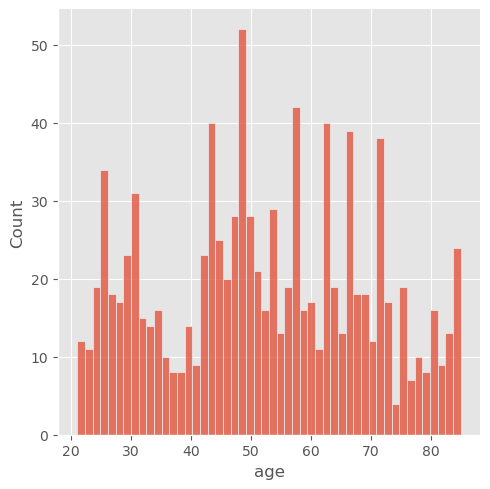

In [33]:
# Vizualize to find out the age distribution of the customers

plt.figure(figsize=(20,10))
sns.displot(new_cust['age'], bins=50, kde=False)

`Looking at the age field there is no descripency in the data`

## Creating Age Group Column

In [30]:
new_cust['Age Group'] = new_cust['age'].apply(lambda x: (math.floor(x/10) + 1)*10)

<Figure size 2000x1000 with 0 Axes>

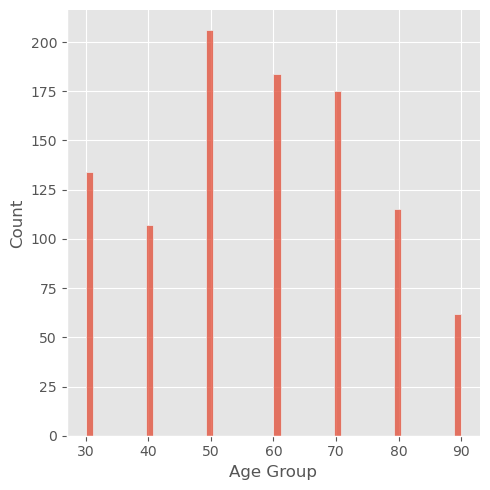

In [32]:
# Visualize the age group distribution

plt.figure(figsize=(20,10))
sns.displot(new_cust['Age Group'], bins=50, kde=False)

`The highest number of New Customers are from the Age Group 50-59.`

### 1.3 Job Title

In [35]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,69,70
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,78,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,63,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,43,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,44,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,46,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,61,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,25,30


In [36]:
new_cust['job_title'].fillna('None', axis=0, inplace=True)

In [37]:
new_cust['job_title'].isnull().sum()

0

## 1.4 Job Industry Category

In [38]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,25,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,46,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,42,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,55,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,57,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,56,60
971,Frieda,Tavinor,Female,43,1999-03-04,None,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,55,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,31,40


In [40]:
new_cust['job_industry_category'].fillna('Missing', axis=0, inplace=True)

In [41]:
new_cust['job_industry_category'].isnull().sum()

0

In [42]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
Age Group                              0
dtype: int64

`Finally there are no missing values in the dataset`

In [43]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


## 2. Inconsistency Checks
We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

### 2.1 Gender
There are no inconsistencies in the gender column

In [45]:
new_cust['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

### 2.2 Wealth Segment

In [46]:
new_cust['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

### 3.3 Deceased Indicator
There is no inconsistent data in deceased_indicator column.

In [47]:
new_cust['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

### 3.4 Owns a Car
There is no inconsistent data in owns_car column

In [48]:
new_cust['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

### 3.5 State
There is no inconsistent data in state column.

In [49]:
new_cust['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

### 3.6 Country
There is no inconsistent data in country column.

In [50]:
new_cust['country'].value_counts()

Australia    983
Name: country, dtype: int64

### 3.7 Postcode
There is no inconsistent data in postcode column.

In [53]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


### 3.8 Address
There is no inconsistent data in address column.

In [54]:
new_cust[['state', 'country', 'address', 'postcode']].sort_values('address')

,state,country,address,postcode
721,NSW,Australia,0 Bay Drive,2750
138,NSW,Australia,0 Dexter Parkway,2380
624,QLD,Australia,0 Emmet Trail,4128
300,QLD,Australia,0 Esker Avenue,4019
685,NSW,Australia,0 Express Lane,2142
...,...,...,...,...
308,NSW,Australia,99 Westend Court,2287
336,VIC,Australia,990 Hoffman Avenue,3029
796,VIC,Australia,99376 Namekagon Street,3101
583,NSW,Australia,9940 Manley Drive,2574


### 2.9 Tenure
There is no inconsistent data in tenure column. The distribution of tenure looks fine.

In [55]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<Figure size 1500x800 with 0 Axes>

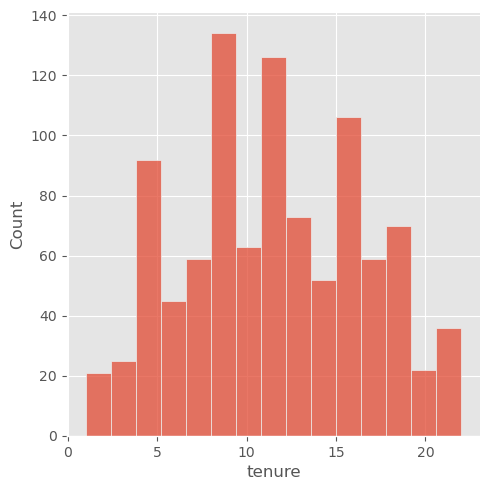

In [59]:
# Distruibution of tenure

plt.figure(figsize=(15,8))
sns.displot(new_cust['tenure'])

## 3. Duplication Checks
We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [61]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Total records after removing duplicates: {}".format(new_cust_dedupped.shape[0]))
print("Total records removed: {}".format(new_cust.shape[0] - new_cust_dedupped.shape[0]))

Total records after removing duplicates: 983
Total records removed: 0


## 4. Exporting the cleaned new customers dataset to csv

In [62]:
new_cust.to_csv('NewCustomers_cleaned.csv', index=False)